In [3]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [4]:
base_ordinal = pd.read_csv('../../Data/BaseOrdinal.csv')

In [5]:
X = base_ordinal.drop(['SalePrice'], axis=1).values
y = base_ordinal.SalePrice.values

In [6]:
len(y)

2580

In [7]:
X.shape

(2580, 82)

In [8]:
X.shape[1]

82

In [9]:
Scores = []
AdjR2 = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    xgb = XGBRegressor()
    xgb.fit(X_train_scaled, Y_train)
    XGB_Score = xgb.score(X_test_scaled, Y_test)
    
    Scores.append(XGB_Score)
    
    Adj_r2 = 1 - (1 - XGB_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AdjR2.append(Adj_r2)
    

In [10]:
PositiveR2 = []
NegativeR2 = []

for i in Scores:
    if i < 0:
        NegativeR2.append(i)
    else:
        PositiveR2.append(i)

In [11]:
PositiveAR2 = []
NegativeAR2 = []

for i in AdjR2:
    if i < 0:
        NegativeAR2.append(i)
    else:
        PositiveAR2.append(i)

In [12]:
R2 = pd.DataFrame(PositiveR2, columns=['R_Squared'])
AR2 = pd.DataFrame(PositiveAR2, columns=['Adjusted_R2'])
R2vAR2 = pd.concat([R2, AR2], axis=1)
R2vAR2

,R_Squared,Adjusted_R2
0,0.909824,0.906863
1,0.918775,0.916108
2,0.836837,0.831479
3,0.916445,0.913701
4,0.881912,0.878034
...,...,...
95,0.851444,0.846565
96,0.903103,0.899921
97,0.900913,0.897659
98,0.870256,0.865995


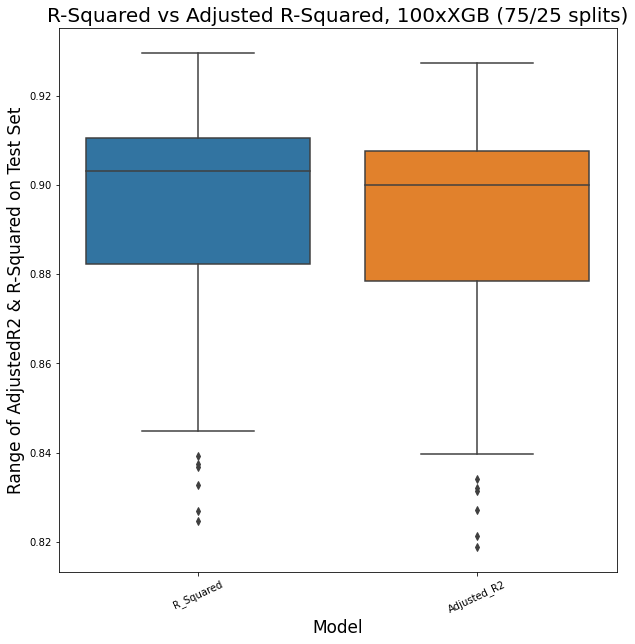

In [13]:
plt.figure(figsize=(10,10))
plt.title('R-Squared vs Adjusted R-Squared, 100xXGB (75/25 splits)', fontsize=20)
plt.ylabel('Range of AdjustedR2 & R-Squared on Test Set', fontsize=17)
plt.xlabel('Model', fontsize=17)
sns.boxplot(data=R2vAR2)
plt.xticks(rotation=25);

In [14]:
print("Number of times results produced Negative R2: " + str((len(NegativeR2))))
print("Number of times results produced Negative Adjusted R2: " + str((len(NegativeAR2))))

Number of times results produced Negative R2: 0
Number of times results produced Negative Adjusted R2: 0


In [15]:
#df = pd.DataFrame(Positive, columns=['Xtreme Boost'])
R2vAR2.to_csv('XGB_R2vAR2.csv', index=False)

In [16]:
R2vAR2['Difference'] = R2vAR2['R_Squared'] - R2vAR2['Adjusted_R2']

In [17]:
R2vAR2

,R_Squared,Adjusted_R2,Difference
0,0.909824,0.906863,0.002961
1,0.918775,0.916108,0.002667
2,0.836837,0.831479,0.005358
3,0.916445,0.913701,0.002744
4,0.881912,0.878034,0.003878
...,...,...,...
95,0.851444,0.846565,0.004879
96,0.903103,0.899921,0.003182
97,0.900913,0.897659,0.003254
98,0.870256,0.865995,0.004261


In [18]:
R2vAR2.Difference.mean()

0.003487667969229952

In [19]:
R2vAR2.describe()

,R_Squared,Adjusted_R2,Difference
count,100.000000,100.000000,100.000000
mean,0.893796,0.890309,0.003488
std,0.025622,0.026463,0.000841
min,0.824617,0.818857,0.002309
25%,0.882255,0.878388,0.002939
50%,0.903235,0.900057,0.003178
75%,0.910506,0.907567,0.003867
max,0.929690,0.927381,0.005759
